In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy


In [2]:
abspath = os.getcwd()
abspath = abspath.split("abag-benchmark-set")[0] + "abag-benchmark-set"

Important Links

In [4]:
idfile=os.path.join(abspath,"data/db/IDs_msas.csv")    # tsv file containing all working IDs

outdir=os.path.join(abspath,"results")

with open(idfile) as f:
    pdbids =  f.read().splitlines()

presets = ['default', 'norecycles', 'subsampling-32-64', 'subsampling-32-64-noresamplemsa']

Load data

In [5]:
score_paths = {preset : os.path.join(abspath, f"data/scores/{preset}/scores_{preset}.csv") for preset in presets}

# Combine all dataframes
data = pd.DataFrame()  # Initialize an empty dataframe

for preset, path in score_paths.items():
    if os.path.exists(path):  # Ensure the file exists
        df = pd.read_csv(path)  # Read the CSV file
        data = pd.concat([data, df], ignore_index=True)  # Concatenate into the combined dataframe
    else:
        print(f"File not found: {path}")



In [5]:
data.columns

Index(['sample_id', 'aln_reference', 'aln_query',
       'fraction_aligned_residues_reference',
       'fraction_aligned_residues_query',
       'min_fraction_aligned_chain_residues_reference',
       'min_fraction_aligned_chain_residues_query', 'reference_cut',
       'query_cut', 'min_dockq', 'max_dockq', 'average_dockq', 'min_lrmsd',
       'max_lrmsd', 'average_lrmsd', 'min_irmsd', 'max_irmsd', 'average_irmsd',
       'min_fnat', 'max_fnat', 'average_fnat', 'min_clashes', 'max_clashes',
       'average_clashes', 'abag_dockq', 'abag_receptor', 'abag_lrmsd',
       'abag_irmsd', 'abag_fnat', 'abag_clashes', 'TM_normalized_reference',
       'TM_normalized_query', 'RMSD', 'aln_reference_cut', 'aln_query_cut',
       'min_pmidockq', 'max_pmidockq', 'average_pmidockq', 'ptm', 'iptm',
       'ranking_confidence', 'num_recycles', 'pdbid', 'Achain', 'Hchain',
       'Lchain', 'reference_pdb', 'query_pdb', 'query_af_features',
       'query_af_data', 'model', 'prediction', 'preset'],
      

In [7]:
print(data[data['min_fraction_aligned_chain_residues_query']> 0.9].shape)
print(data.shape)
print(data[(data['min_fraction_aligned_chain_residues_query'] < 0.8) & (data['min_dockq'] > 0.2)].shape)

(73598, 53)
(88000, 53)
(4, 53)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

def plot_correlation(df, x_axis, y_axis, ax, title):
    """
    Plots scatter and regression lines with Pearson and Spearman correlation on the given axis.
    """

    # Scatter plot
    sns.scatterplot(ax=ax, data=df, x=x_axis, y=y_axis, hue='preset', style='preset')

    # Check if inputs are constant
    if len(df) > 1 and df[x_axis].nunique() > 1 and df[y_axis].nunique() > 1:
        # Calculate correlations
        spearman_corr, _ = spearmanr(df[x_axis], df[y_axis])
        pearson_corr, _ = pearsonr(df[x_axis], df[y_axis])

        # Add regression lines
        sns.regplot(ax=ax, data=df, x=x_axis, y=y_axis, scatter=False, color="red", line_kws={"label": "Pearson Line"})
        sns.regplot(ax=ax, data=df, x=x_axis, y=y_axis, scatter=False, color="blue", lowess=True, line_kws={"label": "Spearman Line"})

        # Add correlation text
        ax.text(0.05, 0.9, f"Pearson: {pearson_corr:.2f}", transform=ax.transAxes, color="red")
        ax.text(0.05, 0.85, f"Spearman: {spearman_corr:.2f}", transform=ax.transAxes, color="blue")
    else:
        # Add a note if correlation cannot be computed
        ax.text(0.5, 0.5, "Constant input or insufficient data", transform=ax.transAxes, 
                ha="center", va="center", fontsize=10, color="gray")

    # Set axis properties
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.legend()

def plot_for_pdbids(data, flags, y_axis, pdbids):
    """
    Iterates through PDB IDs, plotting correlations for each feature in `flags` against `y_axis`.
    """
    for pdbid in pdbids:
        df = data[data['pdbid'] == pdbid]

        n_x_axis = len(flags)
        fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis * 7, 7))

        # Handle single-axis plots
        if n_x_axis == 1:
            axes = [axes]

        for i, x_axis in enumerate(flags):
            plot_correlation(df, x_axis, y_axis, axes[i], f'{pdbid} - {x_axis}')

        plt.tight_layout()
        plt.show()

def plot(data, flags, y_axis):
        n_x_axis = len(flags)
        fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis * 7, 7))

        # Handle single-axis plots
        if n_x_axis == 1:
            axes = [axes]

        for i, x_axis in enumerate(flags):
            plot_correlation(data, x_axis, y_axis, axes[i], f'data - {x_axis}')

        plt.tight_layout()
        plt.show()


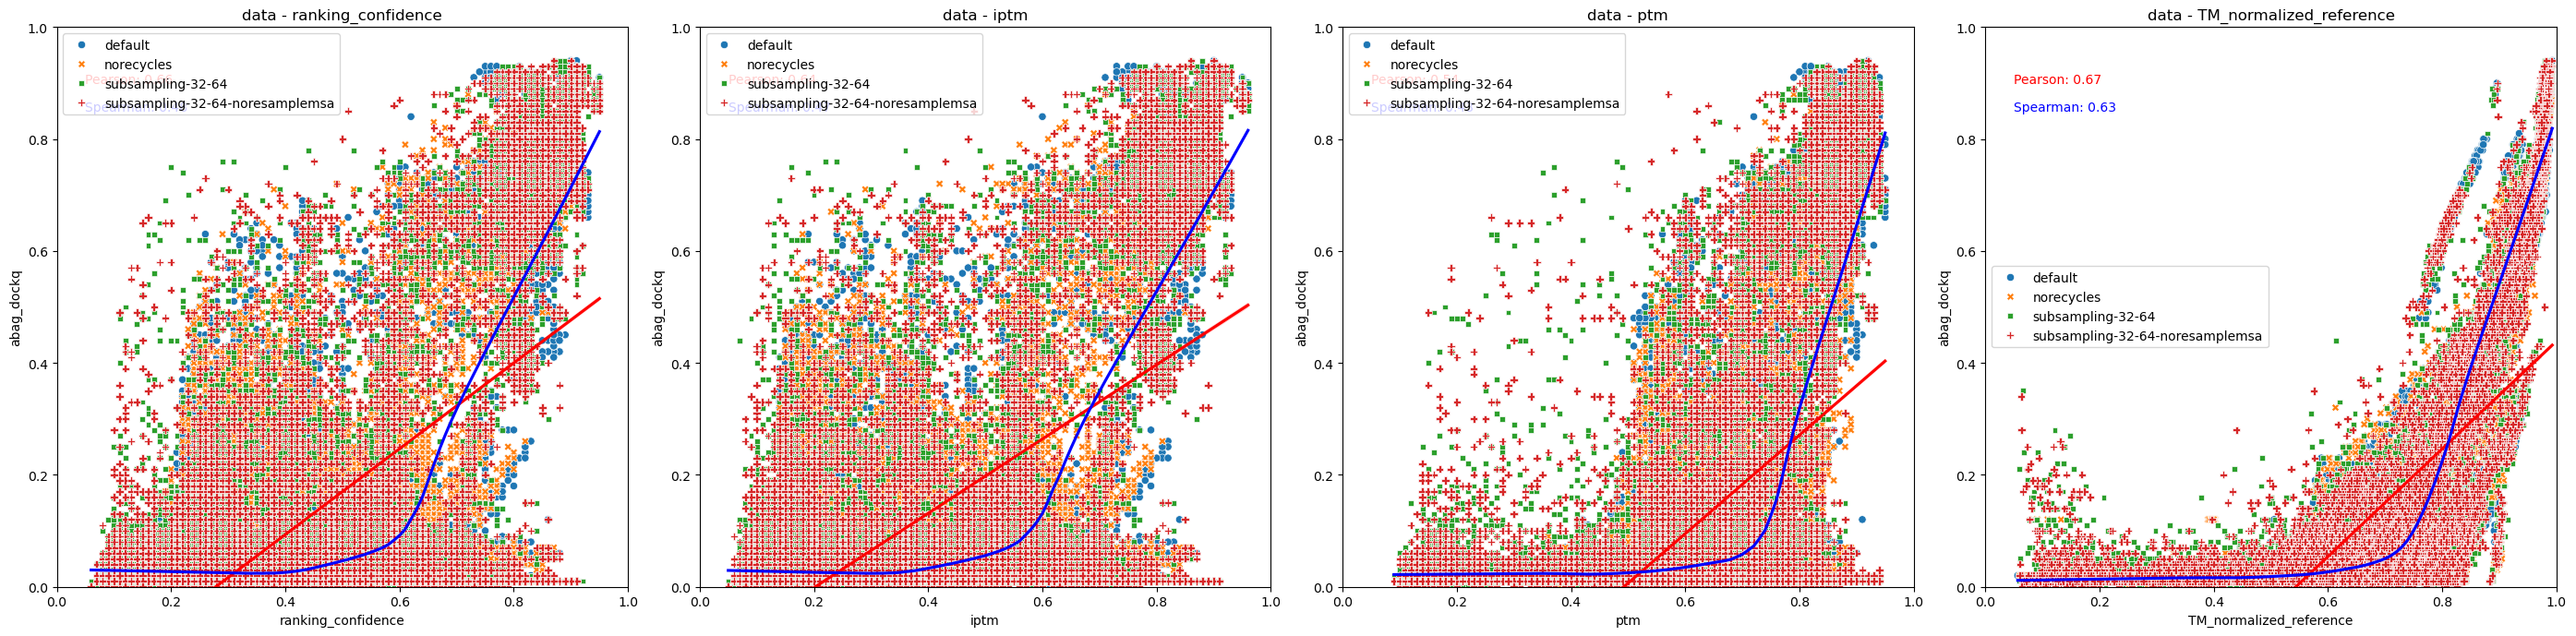

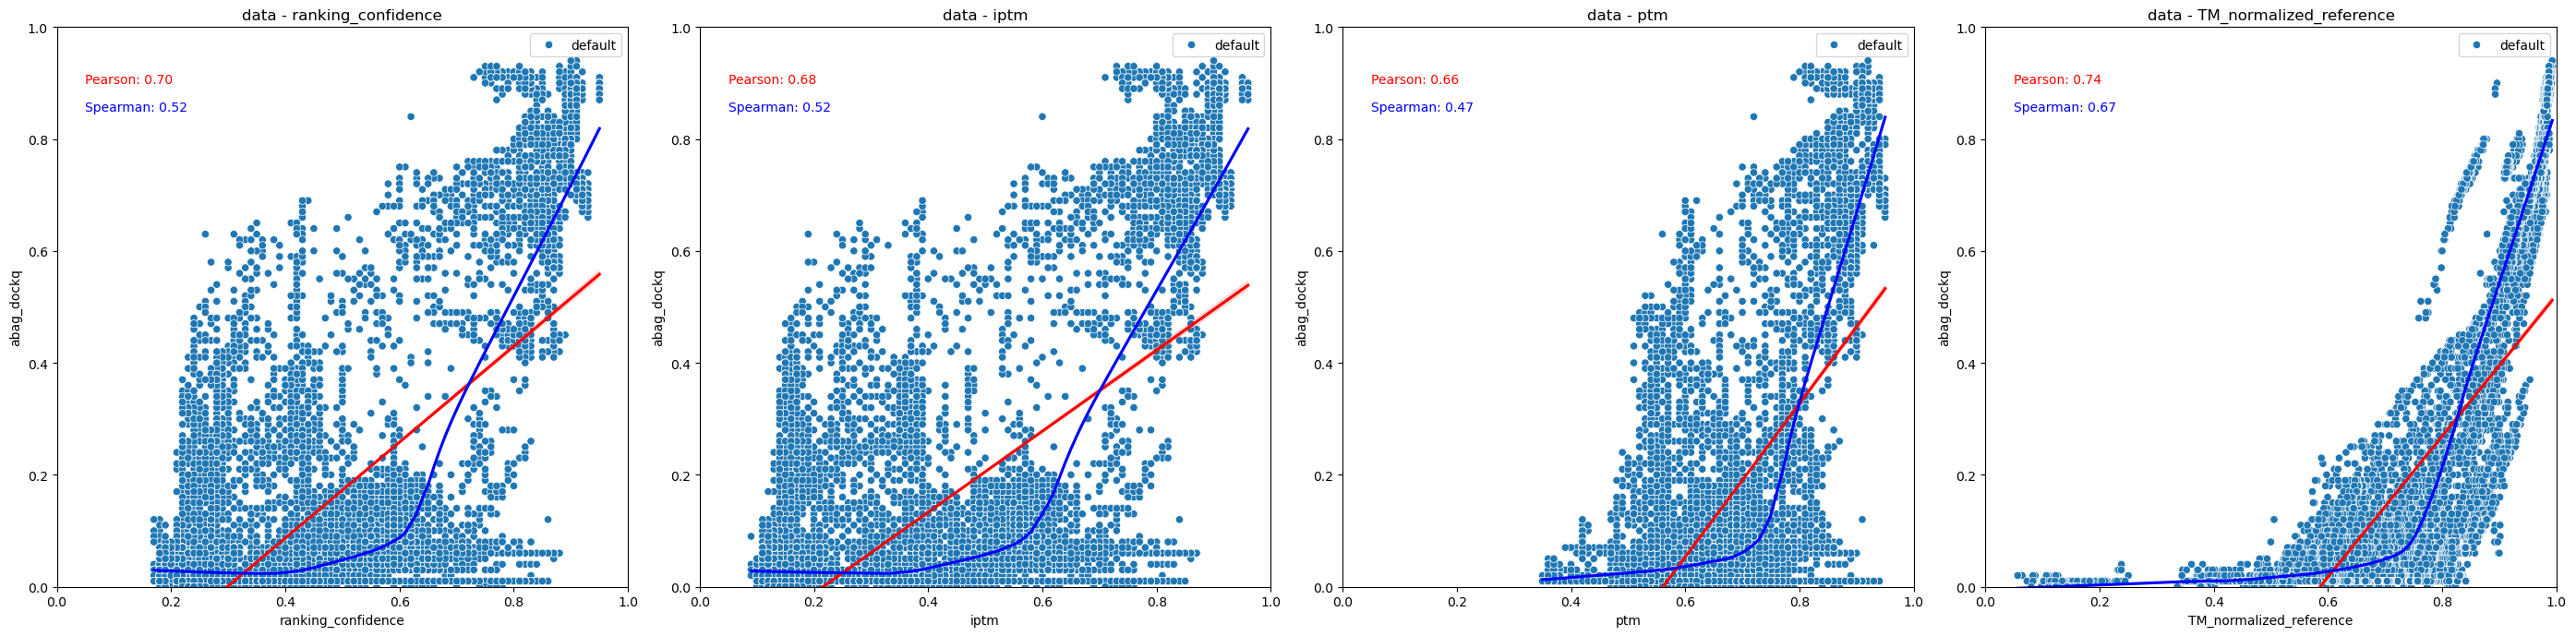

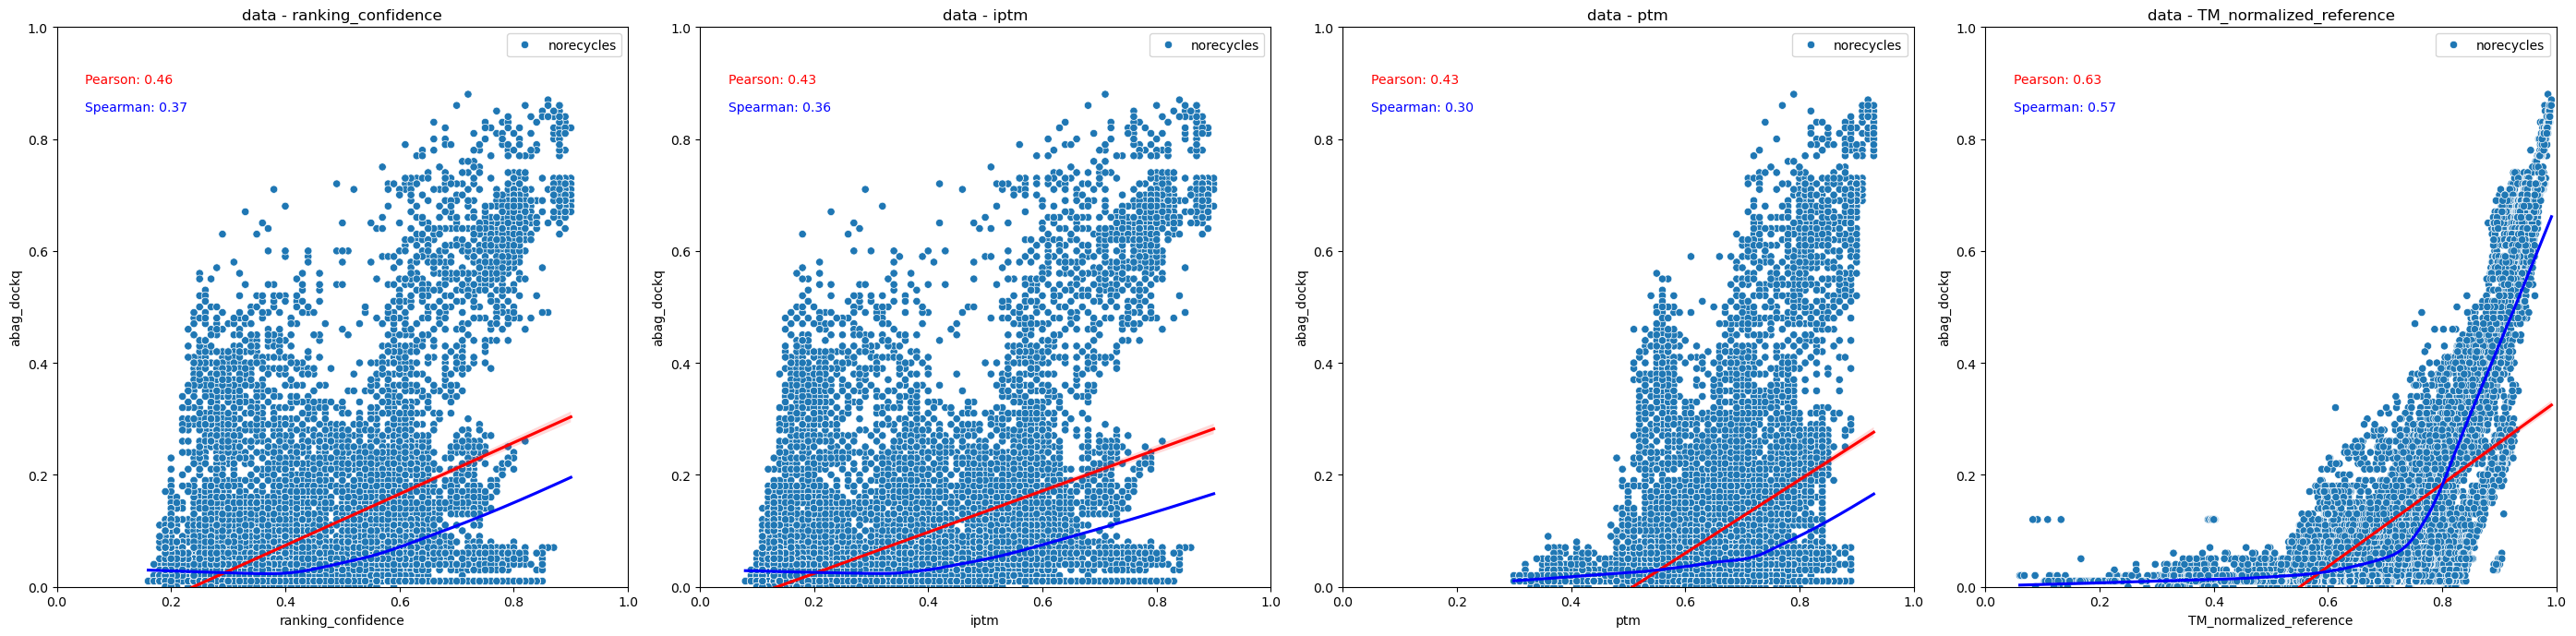

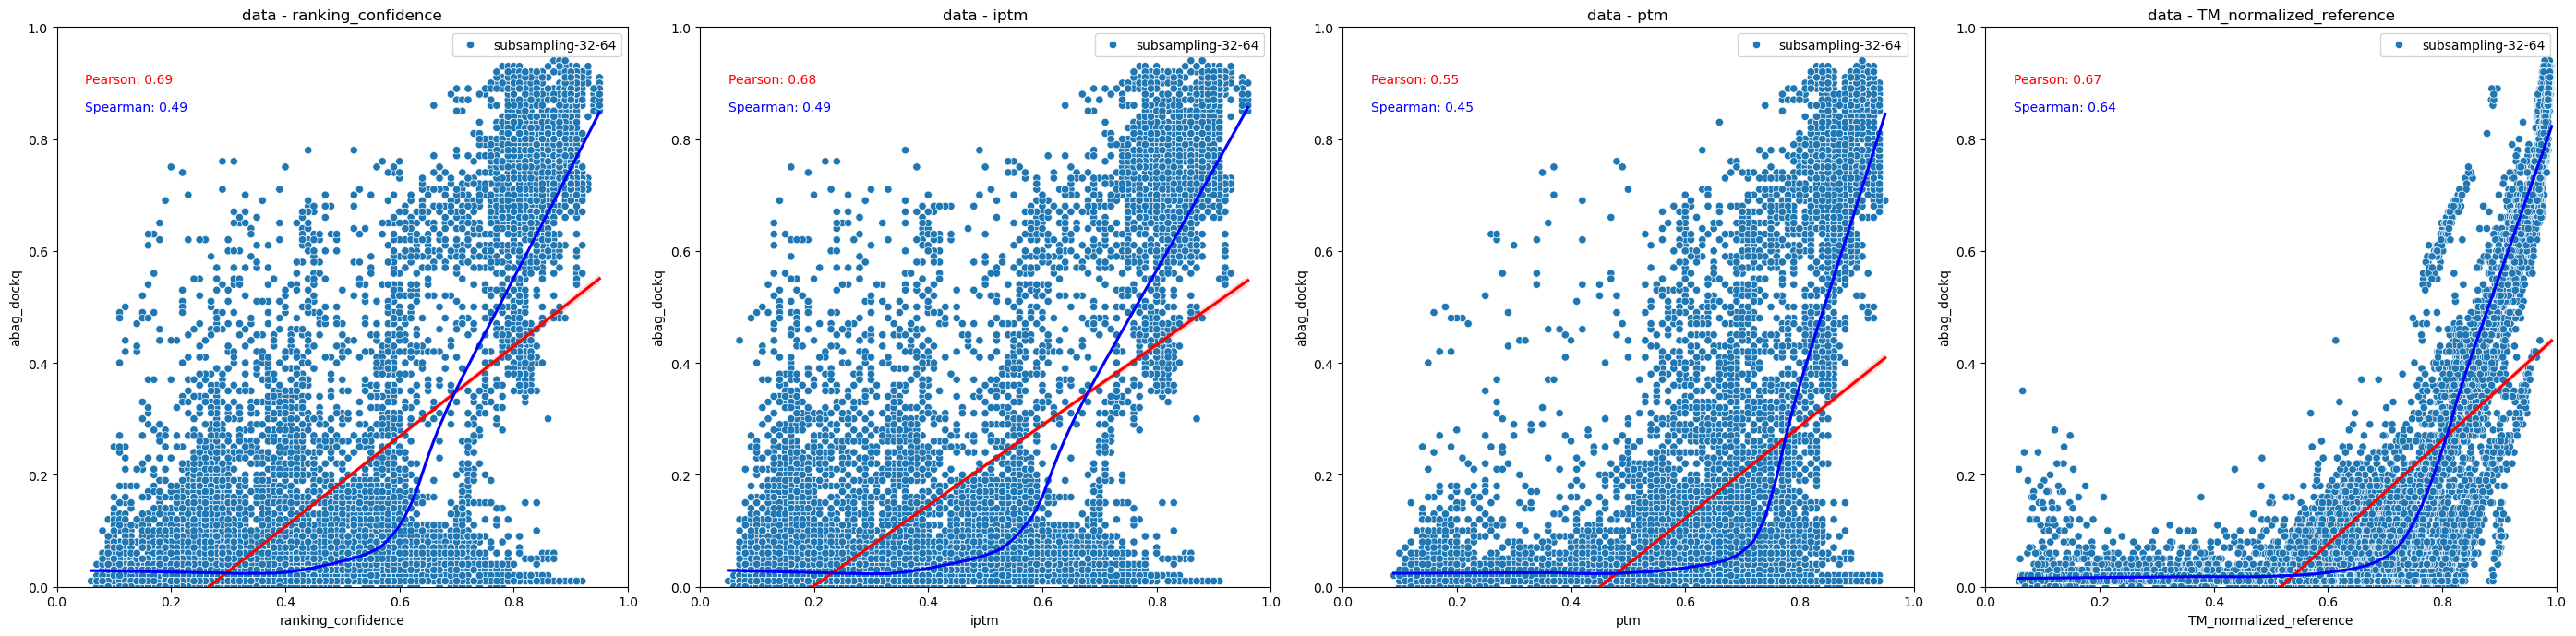

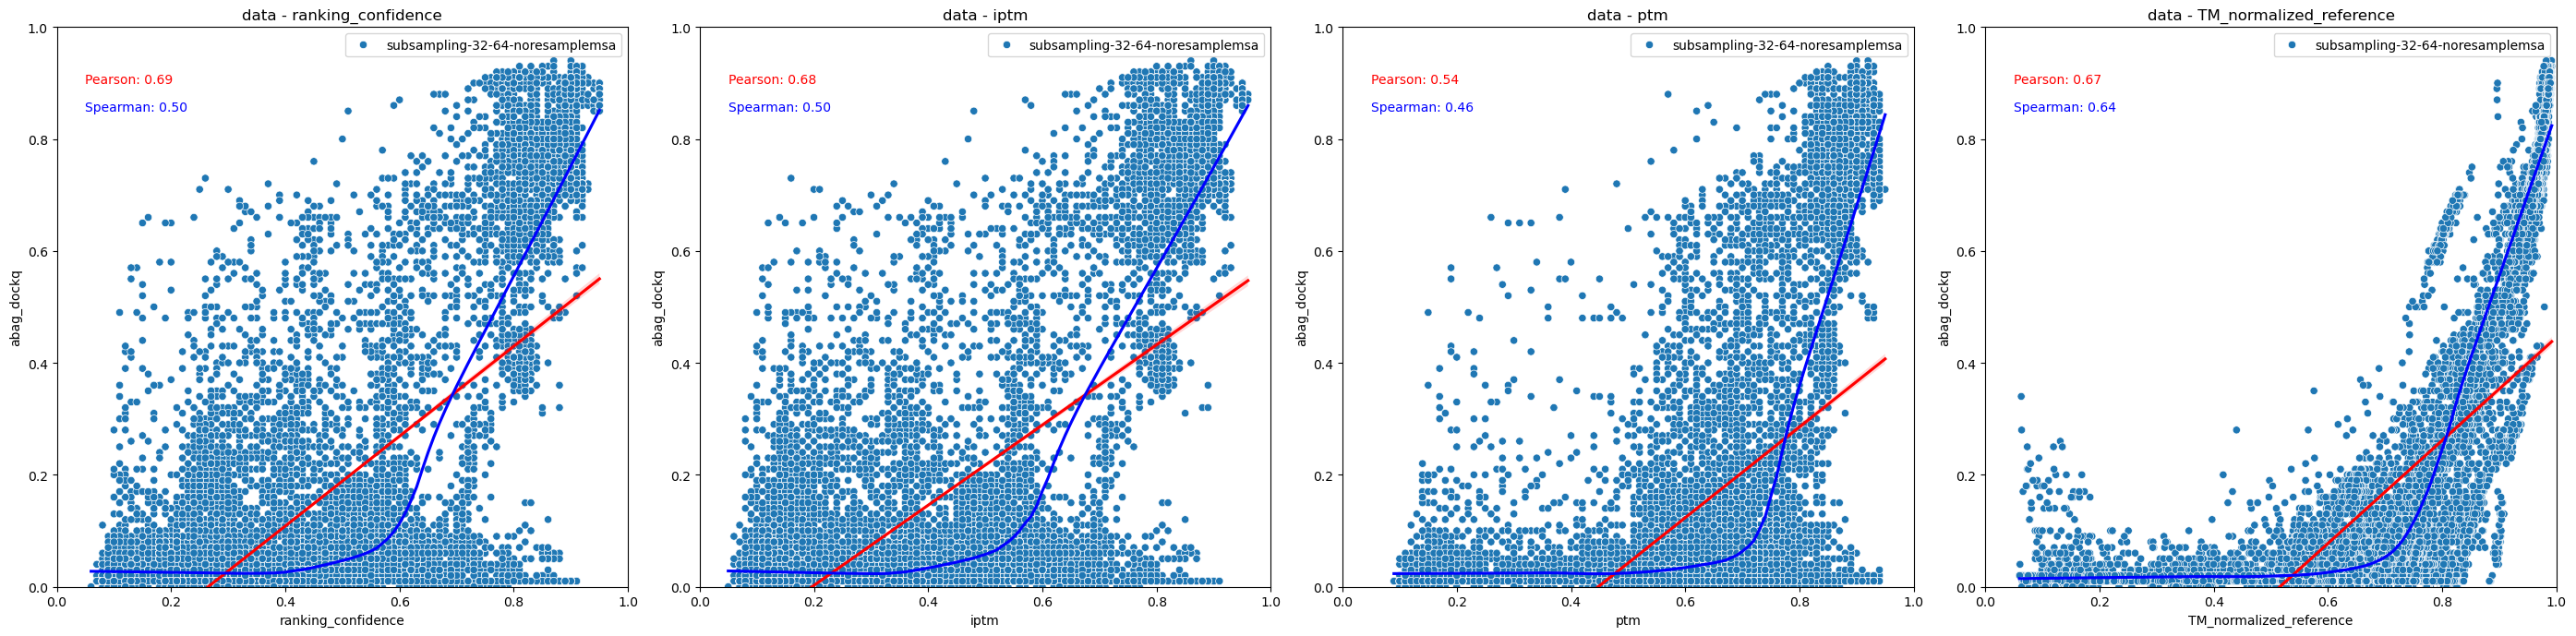

In [10]:
# Input Parameters
flags = ['ranking_confidence', 'iptm', 'ptm', 'TM_normalized_reference']
y_axis = 'abag_dockq'

# Call the function
plot(data, flags, y_axis)
for preset in presets:
    plot(data[data['preset'] == preset], flags, y_axis)


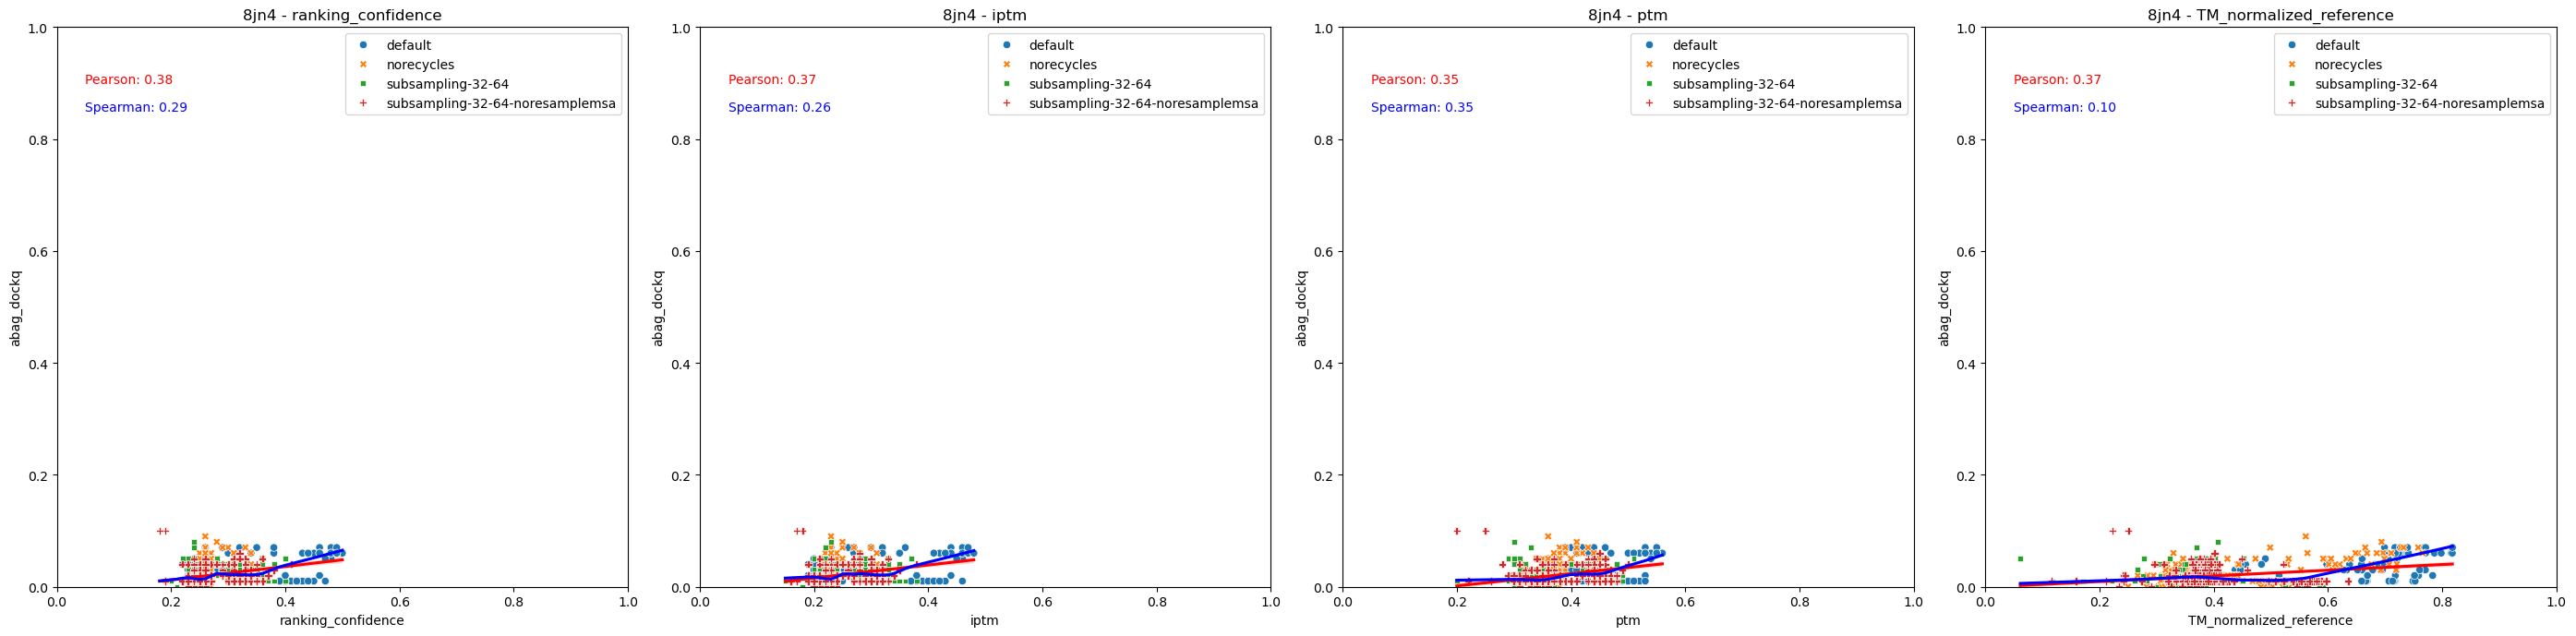

In [11]:
# Input Parameters
flags = ['ranking_confidence', 'iptm', 'ptm', 'TM_normalized_reference']
y_axis = 'abag_dockq'
subselection = pdbids[:2]
subselection = ['8jn4']


# Call the function

plot_for_pdbids(data, flags, y_axis, subselection)

In [ ]:

# Input Parameters
flags = ['ranking_confidence', 'iptm', 'ptm', 'TM_normalized_reference']
y_axis = 'abag_dockq'
subselection = pdbids[:2]
subselection = ['8jn4']


def plot(data, flags, y_axis):
        n_x_axis = len(flags)
        fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis * 7, 7))

        # Handle single-axis plots
        if n_x_axis == 1:
            axes = [axes]

        for i, x_axis in enumerate(flags):
            plot_correlation(data, x_axis, y_axis, axes[i], f'data - {x_axis}')

        plt.tight_layout()
        plt.show()

# Call the function
plot(data, flags, y_axis)
plot_for_pdbids(data, flags, y_axis, subselection)

In [6]:
data = data[data['abag_dockq'] > 0.05]

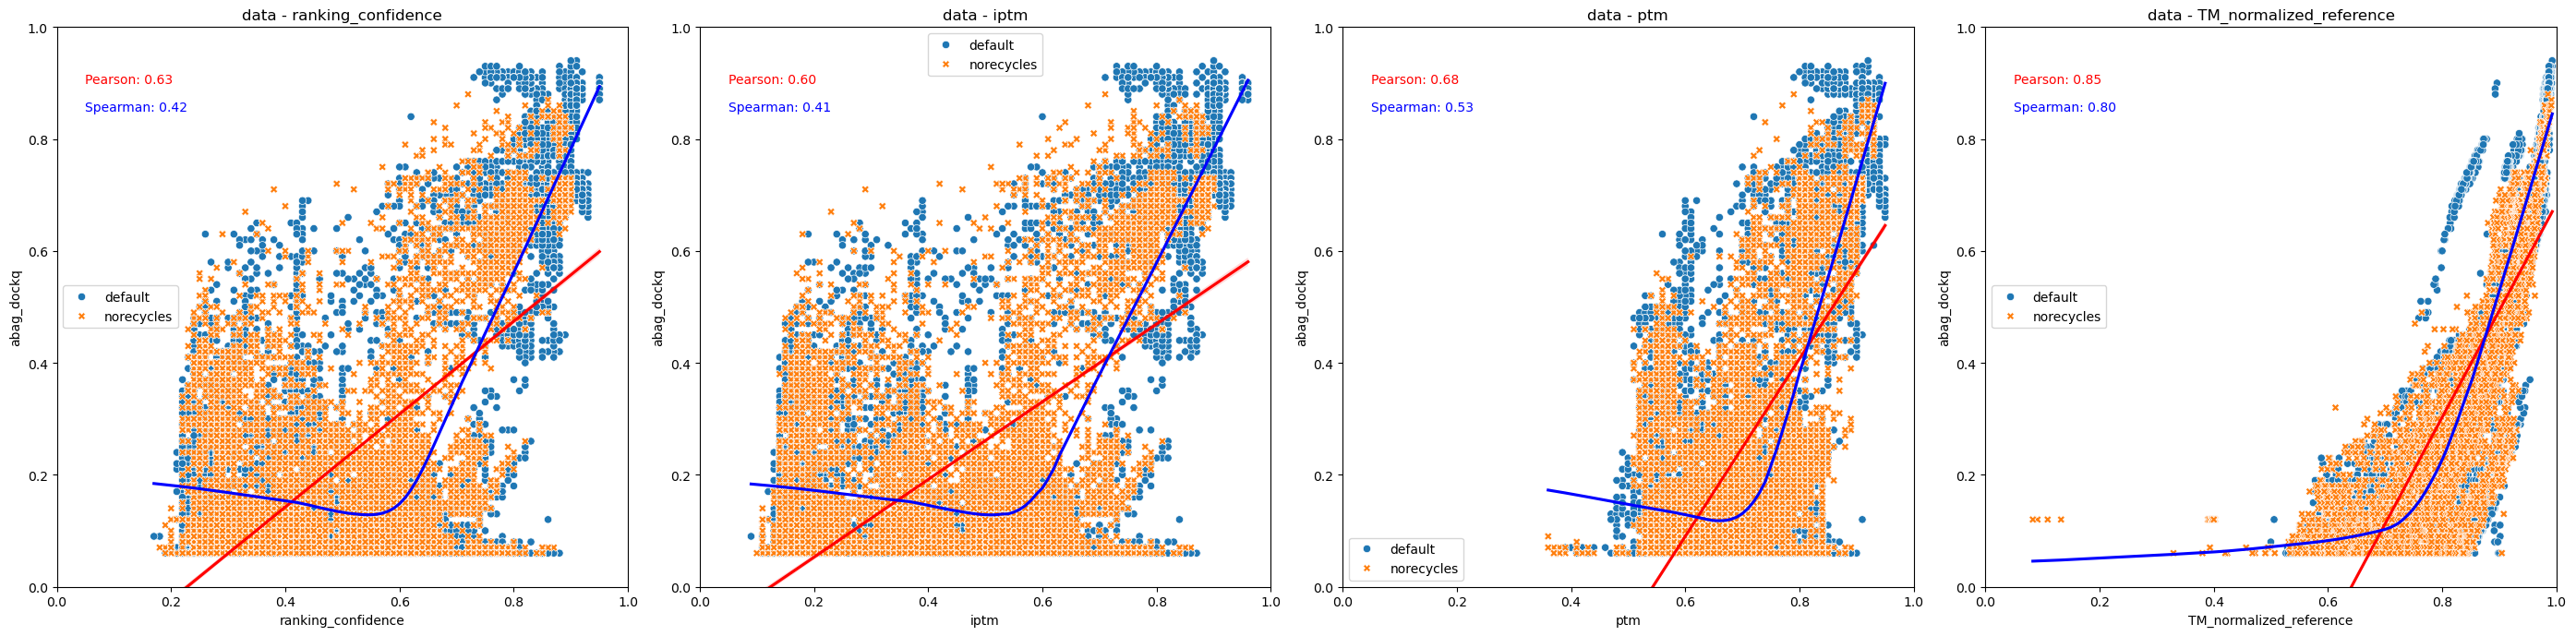

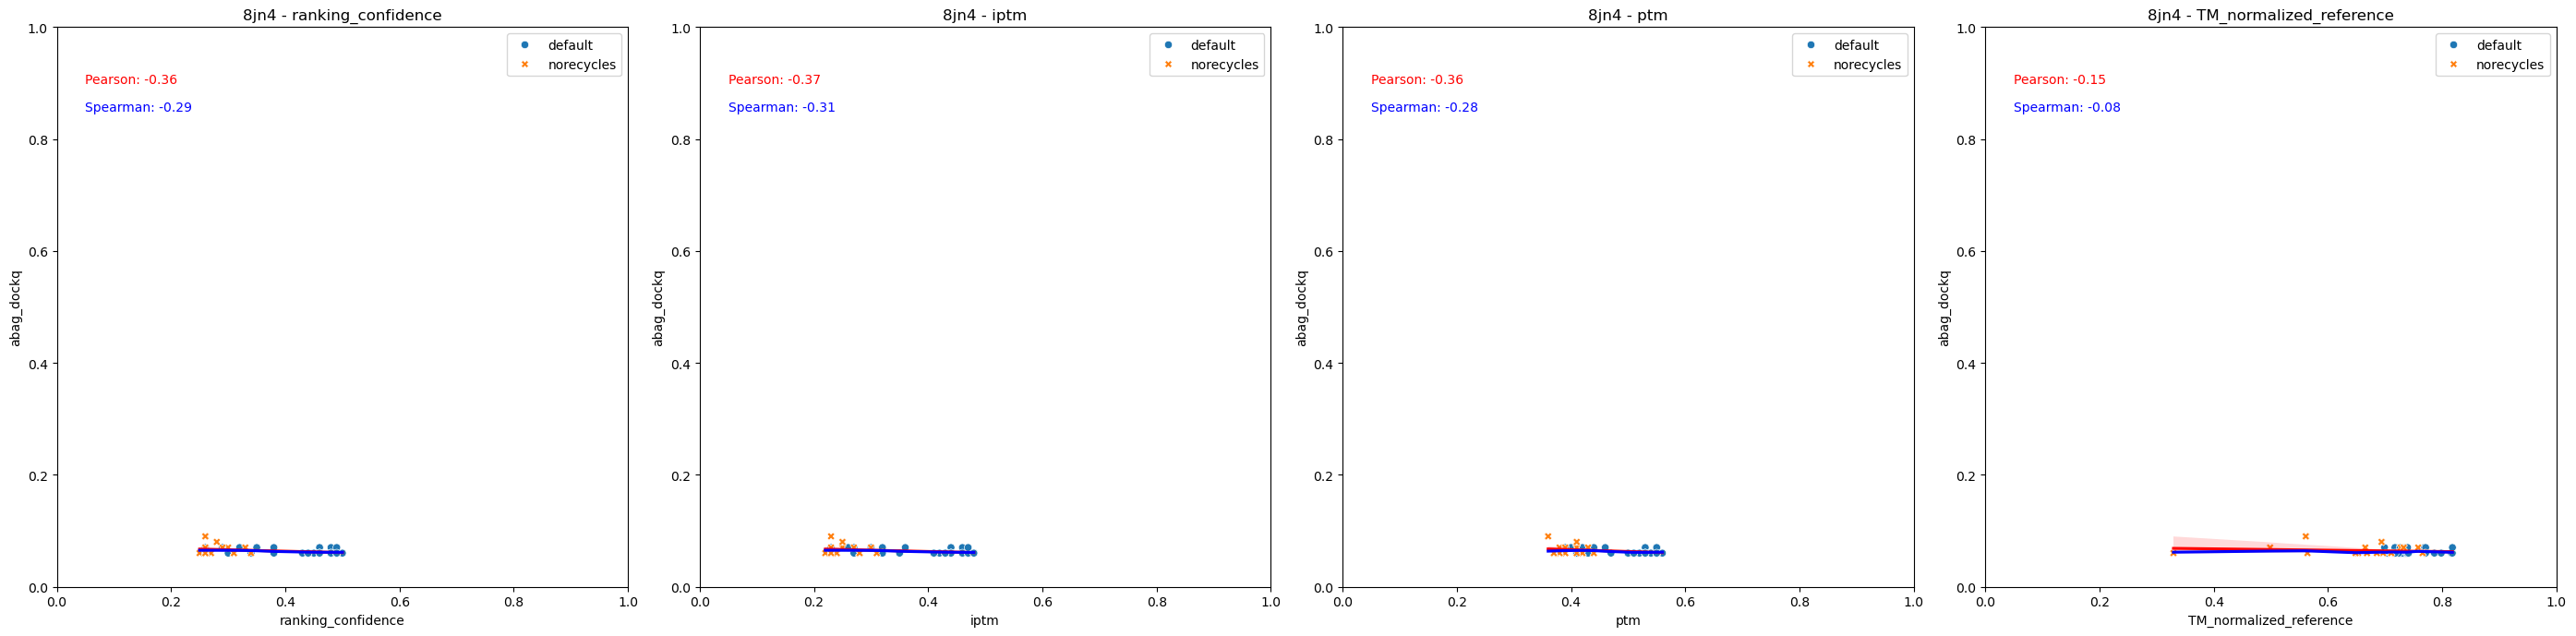

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

def plot_correlation(df, x_axis, y_axis, ax, title):
    """
    Plots scatter and regression lines with Pearson and Spearman correlation on the given axis.
    """

    # Scatter plot
    sns.scatterplot(ax=ax, data=df, x=x_axis, y=y_axis, hue='preset', style='preset')

    # Check if inputs are constant
    if len(df) > 1 and df[x_axis].nunique() > 1 and df[y_axis].nunique() > 1:
        # Calculate correlations
        spearman_corr, _ = spearmanr(df[x_axis], df[y_axis])
        pearson_corr, _ = pearsonr(df[x_axis], df[y_axis])

        # Add regression lines
        sns.regplot(ax=ax, data=df, x=x_axis, y=y_axis, scatter=False, color="red", line_kws={"label": "Pearson Line"})
        sns.regplot(ax=ax, data=df, x=x_axis, y=y_axis, scatter=False, color="blue", lowess=True, line_kws={"label": "Spearman Line"})

        # Add correlation text
        ax.text(0.05, 0.9, f"Pearson: {pearson_corr:.2f}", transform=ax.transAxes, color="red")
        ax.text(0.05, 0.85, f"Spearman: {spearman_corr:.2f}", transform=ax.transAxes, color="blue")
    else:
        # Add a note if correlation cannot be computed
        ax.text(0.5, 0.5, "Constant input or insufficient data", transform=ax.transAxes, 
                ha="center", va="center", fontsize=10, color="gray")

    # Set axis properties
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.legend()

def plot_for_pdbids(data, flags, y_axis, pdbids):
    """
    Iterates through PDB IDs, plotting correlations for each feature in `flags` against `y_axis`.
    """
    for pdbid in pdbids:
        df = data[data['pdbid'] == pdbid]

        n_x_axis = len(flags)
        fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis * 7, 7))

        # Handle single-axis plots
        if n_x_axis == 1:
            axes = [axes]

        for i, x_axis in enumerate(flags):
            plot_correlation(df, x_axis, y_axis, axes[i], f'{pdbid} - {x_axis}')

        plt.tight_layout()
        plt.show()

# Input Parameters
flags = ['ranking_confidence', 'iptm', 'ptm', 'TM_normalized_reference']
y_axis = 'abag_dockq'
subselection = pdbids[:2]
subselection = ['8jn4']


def plot(data, flags, y_axis):
        n_x_axis = len(flags)
        fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis * 7, 7))

        # Handle single-axis plots
        if n_x_axis == 1:
            axes = [axes]

        for i, x_axis in enumerate(flags):
            plot_correlation(data, x_axis, y_axis, axes[i], f'data - {x_axis}')

        plt.tight_layout()
        plt.show()

# Call the function
plot(data, flags, y_axis)
plot_for_pdbids(data, flags, y_axis, subselection)

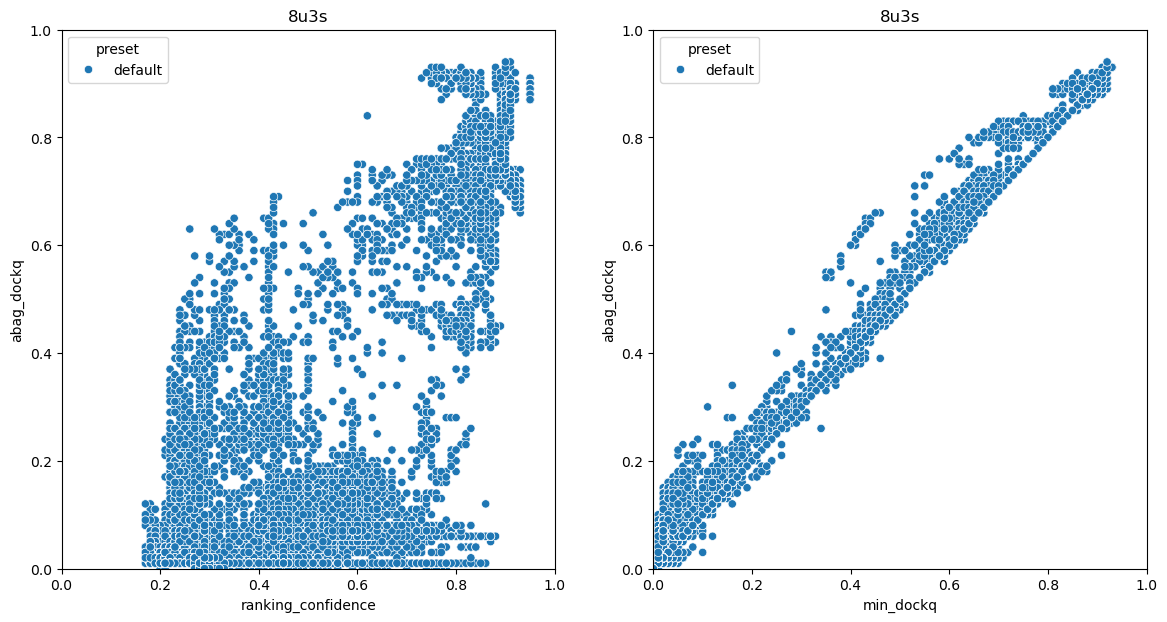

In [11]:

flags = ['ranking_confidence','min_dockq']
y_axis = 'abag_dockq'


n_x_axis = len(flags)
fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis*7, 1*7))
for i in range(n_x_axis):
    curr_ax = axes[i]
    sns.scatterplot(ax=curr_ax, data=data,x=flags[i],y=y_axis, hue='preset', style='preset')
    curr_ax.set_title(f'{pdbid}')
    curr_ax.set_xlim(0,1)
    curr_ax.set_ylim(0,1)
    #curr_ax.text(2/3, 0.5, f'corr={round(corr_df[flags[i]][y_axis],2)}', horizontalalignment='center', verticalalignment='center')



